# The Spark Foundation

## Data Science and Business Analytics Internship


### Task #5 : Exploratory Data Analysis - Sports 

#### Author : Supriya Nagpal

#### Problem: Perform Exploratory Data Analysis (EDA) on Indian Premier League. As a sports analysts, Find out the most successful teams, players and factors contributing win or loss of a team. Suggest teams or players a company should endorse for its products?


#### Dataset : https://bit.ly/34SRn3b

### 1. Import Required Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### 2. Read and Visualize

In [2]:
#Location of Data required

path_d = r"Deliveries.csv"
d_data = pd.read_csv(path_d)

path_m = r"Matches.csv"
m_data = pd.read_csv(path_m)

In [3]:
d_data.info() #Information about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [4]:
d_data.head() #Shows only first 5 rows of the data

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [5]:
d_data.tail() ##Shows only last 5 rows of the data

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179077,11415,2,Chennai Super Kings,Mumbai Indians,20,6,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,0,0,0,SN Thakur,lbw,NaN


In [6]:
d_data #Shows the full data

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [7]:
m_data.info() #Information about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [8]:
m_data.head() #Shows only first 5 rows of the data

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [9]:
m_data.tail() ##Shows only last 5 rows of the data

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin
755,11415,2019,Hyderabad,12/05/19,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong


In [10]:
m_data #Shows the full data

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [11]:
d_data.shape #Gives number of rows and columns

(179078, 21)

In [12]:
m_data.shape #Gives number of rows and columns

(756, 18)

In [13]:
d_data.drop('match_id', axis = 1, inplace = True) #Drops the specific column
d_data.columns #Tells the name of remaining columns

Index(['inning', 'batting_team', 'bowling_team', 'over', 'ball', 'batsman',
       'non_striker', 'bowler', 'is_super_over', 'wide_runs', 'bye_runs',
       'legbye_runs', 'noball_runs', 'penalty_runs', 'batsman_runs',
       'extra_runs', 'total_runs', 'player_dismissed', 'dismissal_kind',
       'fielder'],
      dtype='object')

In [14]:
m_data.columns #Tells the name of remaining columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [15]:
d_data.isnull().sum() #To check null value

inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [16]:
m_data.isnull().sum() #To check null value

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [17]:
d_data.duplicated().sum() #To check duplicate value

398

In [18]:
m_data.duplicated().sum() #To check duplicate value

0

In [19]:
d_data.drop_duplicates(inplace = True) #Drops the rows with similar entries
d_data.shape #Gives number of rows and columns

(178680, 20)

In [20]:
m_data.drop_duplicates(inplace = True) #Drops the rows with similar entries
m_data.shape #Gives number of rows and columns

(756, 18)

In [21]:
d_data #Shows the full data

,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN


In [22]:
m_data #Shows the full data

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


The number of rows left is 178680 as 398 rows had similar entries in Deliveries data set.

### 3. Observation

In [23]:
d_data.describe() #Inform about important statistical terms depending on Data

,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,178680.000000,178680.000000,178680.000000,178680.000000,178680.000000,178680.000000,178680.000000,178680.000000,178680.000000,178680.000000,178680.000000,178680.000000
mean,1.483126,10.174429,3.616404,0.000453,0.036798,0.004947,0.021178,0.004192,0.000056,1.248293,0.067170,1.315463
std,0.502085,5.672996,1.806956,0.021287,0.251424,0.116609,0.195109,0.070571,0.016728,1.608918,0.342905,1.606003
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [24]:
d_data.inning.nunique() #Inform number of season of matches

5

In [25]:
d_data.inning.unique() #Inform season of matches

array([1, 2, 3, 4, 5], dtype=int64)

In [26]:
m_data.describe() #Inform about important statistical terms depending on Data

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [27]:
m_data.season.nunique() #Inform number of season of matches

12

In [28]:
m_data.season.unique() #Inform season of matches

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019], dtype=int64)

In [29]:
#Maximum Scores

m_data.iloc[m_data['win_by_runs'].idxmax()]

id                               44
season                         2017
city                          Delhi
date                     2017-05-06
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
umpire3                         NaN
Name: 43, dtype: object

In [30]:
#Match won by maximum runs

m_data.iloc[m_data['win_by_runs'].idxmax()]['winner']

'Mumbai Indians'

In [31]:
#Minimum Scores

m_data.iloc[m_data['win_by_runs'].idxmin()]

id                                                       2
season                                                2017
city                                                  Pune
date                                            2017-04-06
team1                                       Mumbai Indians
team2                               Rising Pune Supergiant
toss_winner                         Rising Pune Supergiant
toss_decision                                        field
result                                              normal
dl_applied                                               0
winner                              Rising Pune Supergiant
win_by_runs                                              0
win_by_wickets                                           7
player_of_match                                  SPD Smith
venue              Maharashtra Cricket Association Stadium
umpire1                                     A Nand Kishore
umpire2                                             S Ra

In [32]:
#Match won by minimum runs

m_data.iloc[m_data['win_by_runs'].idxmin()]['winner']

'Rising Pune Supergiant'

In [33]:
#Maximum Wickets

m_data.iloc[m_data['win_by_wickets'].idxmax()]

id                                                      3
season                                               2017
city                                               Rajkot
date                                           2017-04-07
team1                                       Gujarat Lions
team2                               Kolkata Knight Riders
toss_winner                         Kolkata Knight Riders
toss_decision                                       field
result                                             normal
dl_applied                                              0
winner                              Kolkata Knight Riders
win_by_runs                                             0
win_by_wickets                                         10
player_of_match                                   CA Lynn
venue              Saurashtra Cricket Association Stadium
umpire1                                       Nitin Menon
umpire2                                         CK Nandan
umpire3       

In [34]:
#Match won by maximum wickets

m_data.iloc[m_data['win_by_wickets'].idxmax()]['winner']

'Kolkata Knight Riders'

In [35]:
#Minimum Wickets

m_data.iloc[m_data['win_by_wickets'].idxmin()]

id                                                         1
season                                                  2017
city                                               Hyderabad
date                                              2017-04-05
team1                                    Sunrisers Hyderabad
team2                            Royal Challengers Bangalore
toss_winner                      Royal Challengers Bangalore
toss_decision                                          field
result                                                normal
dl_applied                                                 0
winner                                   Sunrisers Hyderabad
win_by_runs                                               35
win_by_wickets                                             0
player_of_match                                 Yuvraj Singh
venue              Rajiv Gandhi International Stadium, Uppal
umpire1                                          AY Dandekar
umpire2                 

In [36]:
#Match won by minimum wickets

m_data.iloc[m_data['win_by_wickets'].idxmin()]['winner']

'Sunrisers Hyderabad'

1. Mumbai Indians won by maximum runs.
2. Kolkata Knight Riders won by maximum wickets.
3. Rising PuneSupergiant won by minimum runs.
4. Sunrisers Hyderabad won  by minimum wickets.

### 4. Representation Matches Data

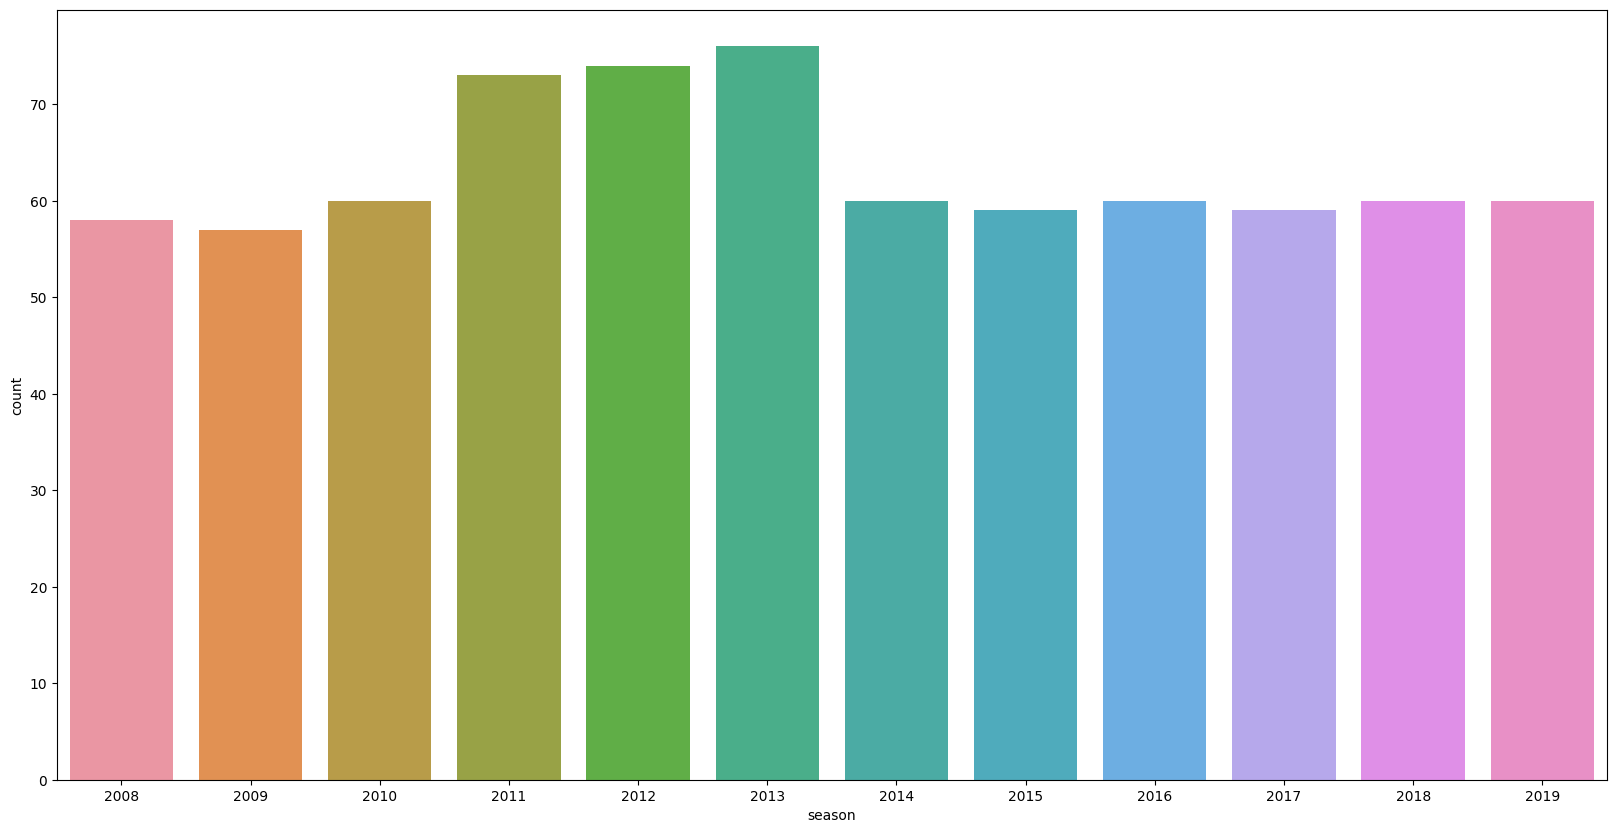

In [37]:
#Matches played in each season

plt.figure(figsize = (20, 10))
sns.countplot(x = 'season', data = m_data)
plt.show()

Most matches were played in year 2013

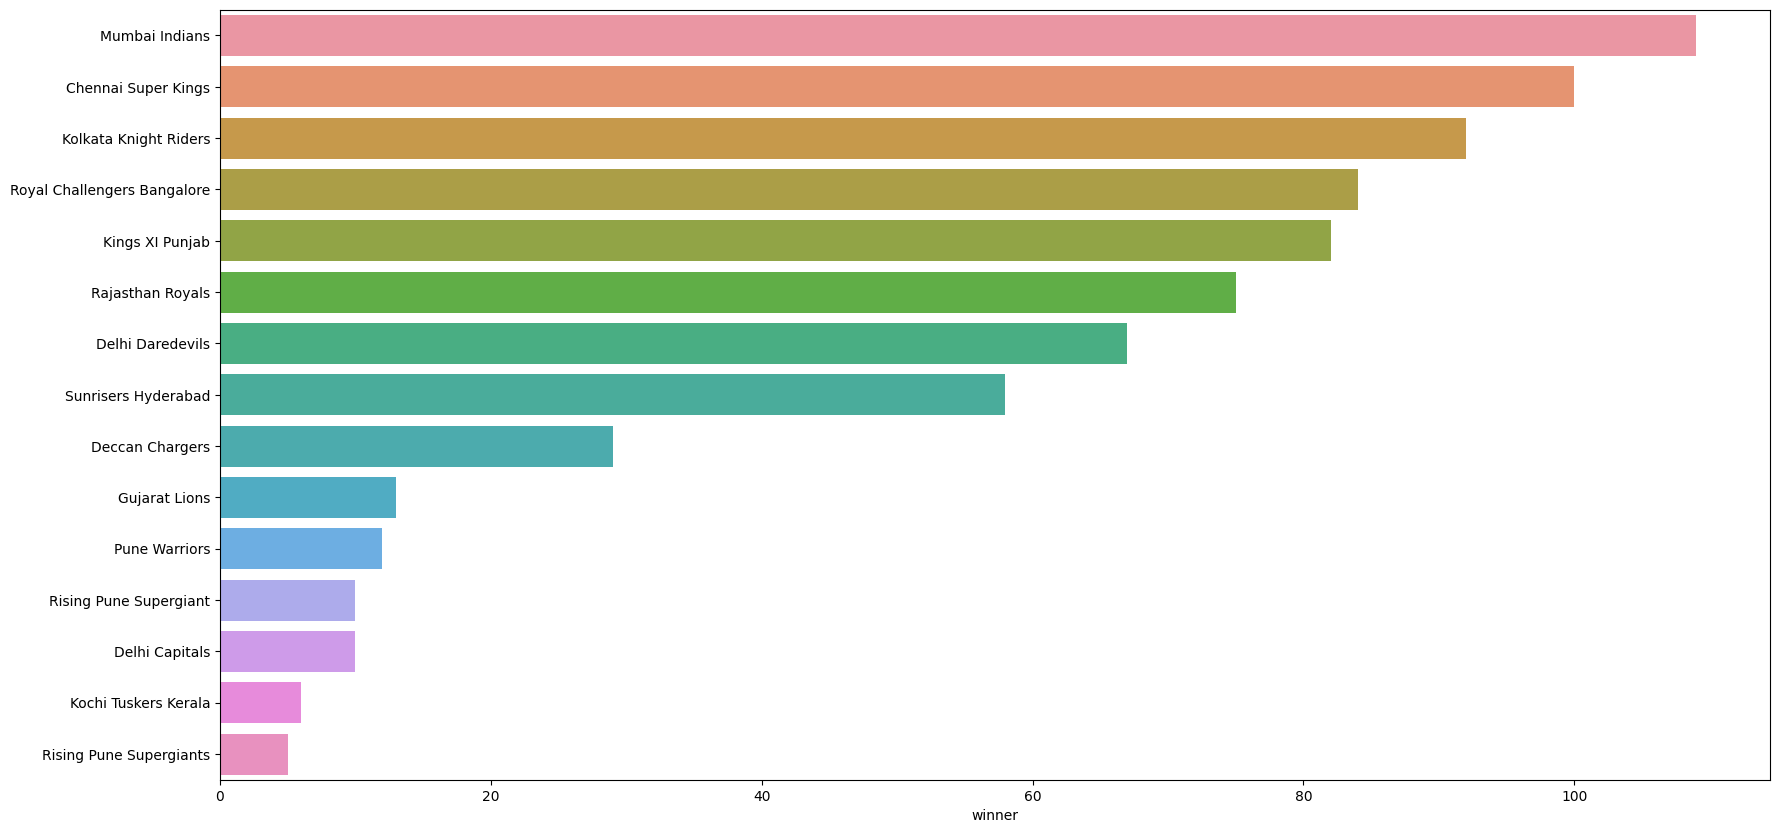

In [38]:
#Matches played by each team

plt.figure(figsize = (20, 10))
count_m_data = m_data.winner.value_counts()
sns.barplot(x = count_m_data, y = count_m_data.index, orient = 'h')
plt.show()

Most matches were played by Mumbai Indians

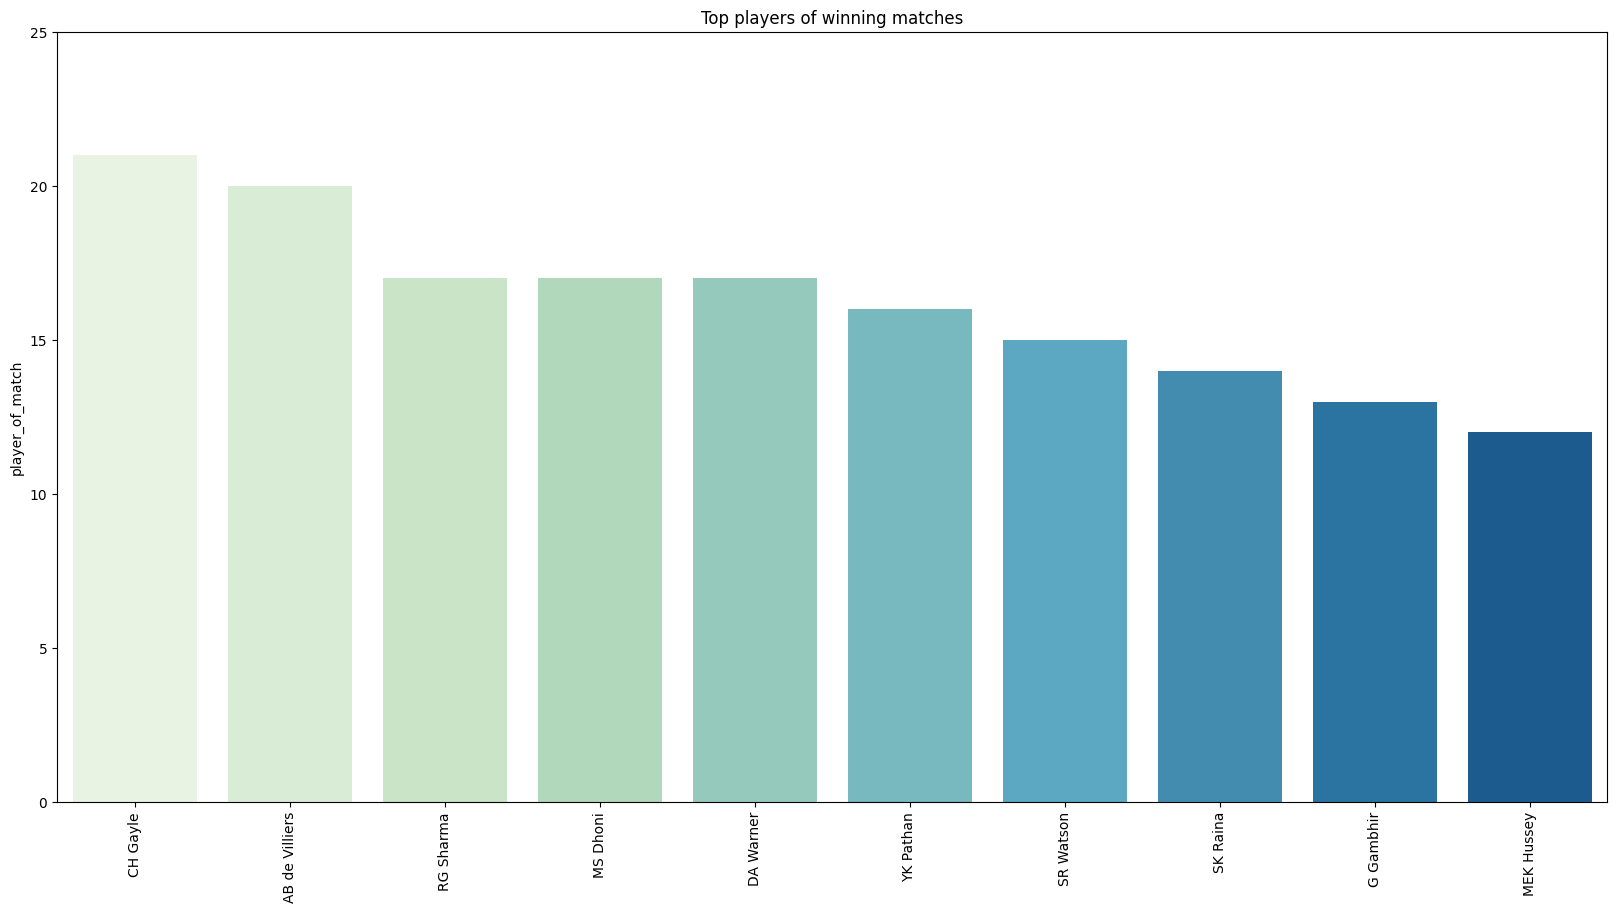

In [39]:
#Top players of winning matches

t_players = m_data.player_of_match.value_counts()[:10]
Fig, md = plt.subplots(figsize = (20, 10))

md.set_ylim([0,25])
md.set_ylabel("Count")
md.set_title("Top players of winning matches")

t_players.plot.bar()
sns.barplot(x = t_players.index, y = t_players, orient = 'v', palette = 'GnBu');
plt.show()

'Chris Gayle' is the most successful player winning all matches.

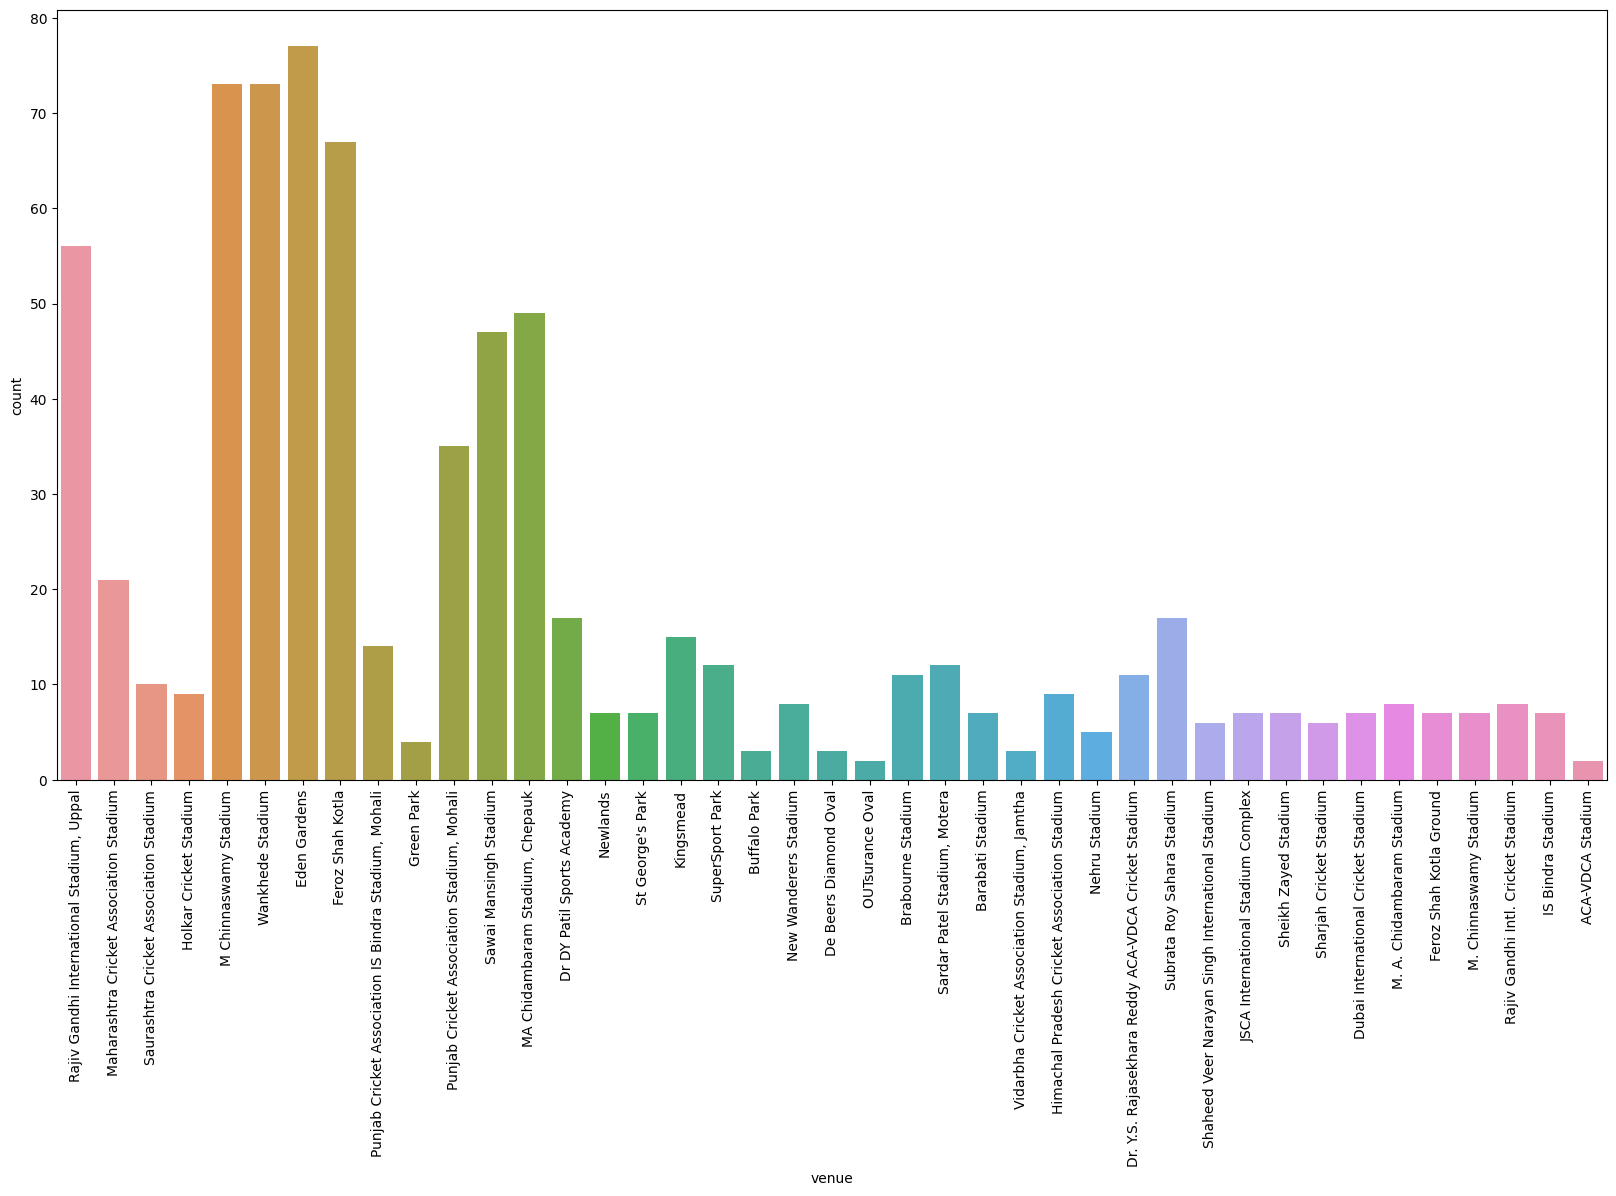

In [40]:
# Matches according to venue

plt.figure(figsize = (20, 10))
sns.countplot(x = 'venue', data = m_data)
plt.xticks(rotation = 90)
plt.show()

The venue 'Eden Gardens' is where most of the matches held followed by 'M Chinnaswamy Stadium' and 'Wankhede Stadium'.

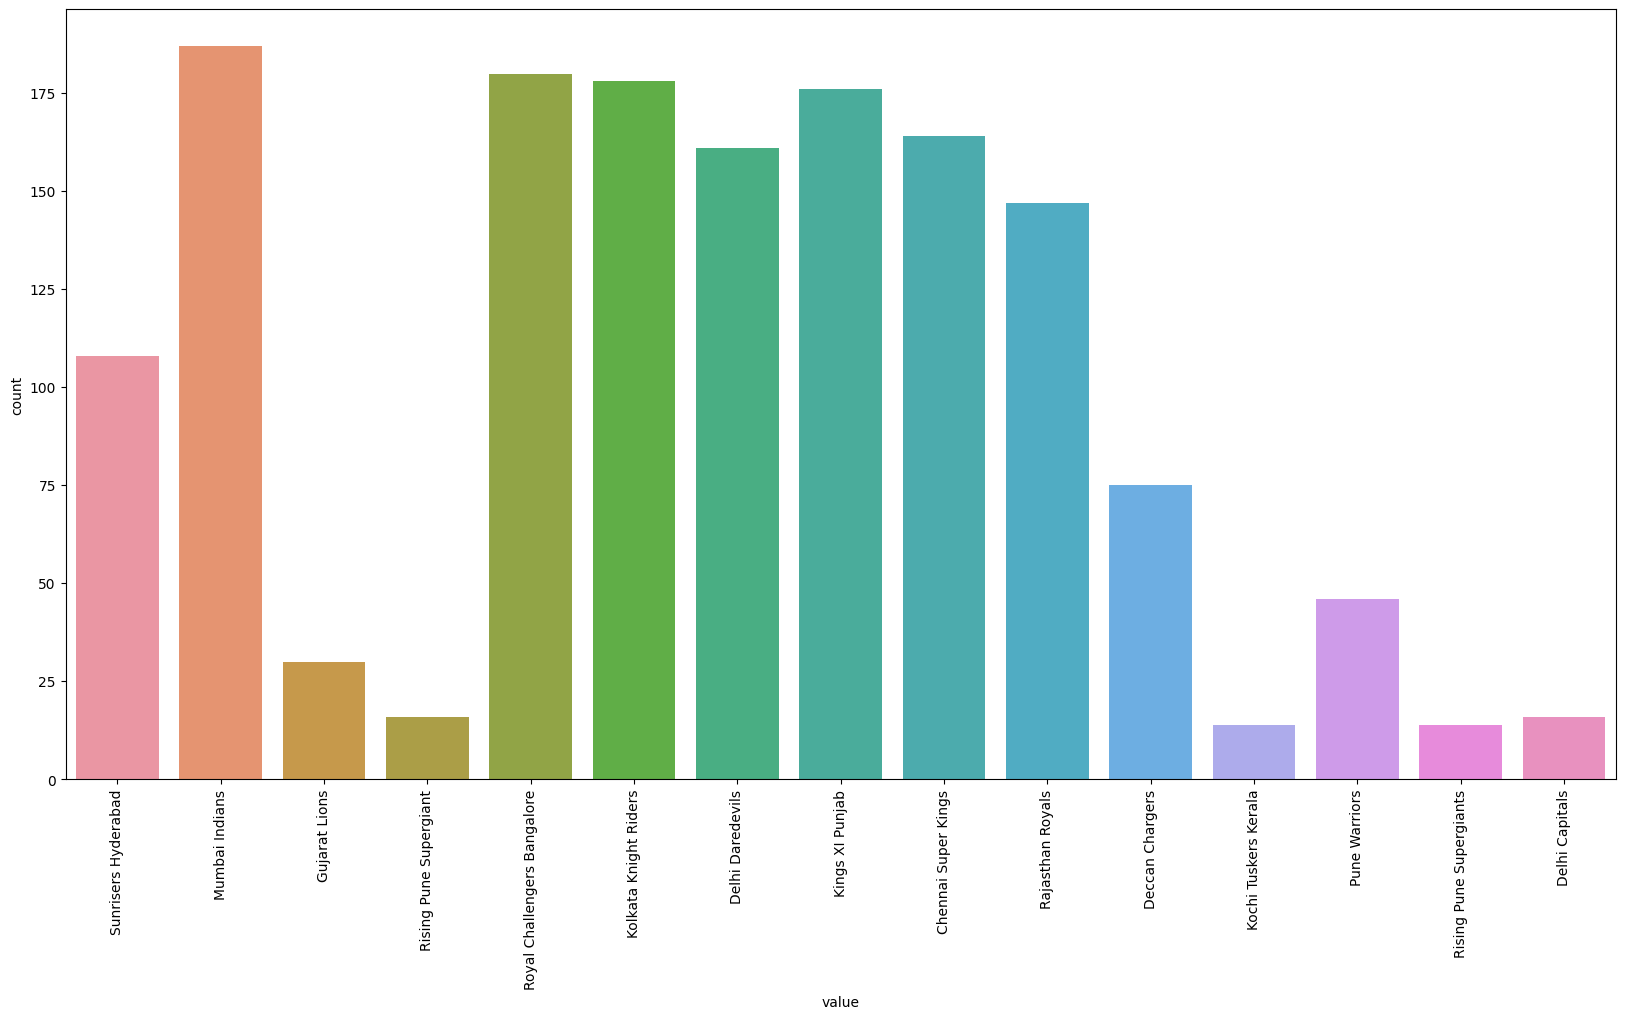

In [41]:
#Matches played per team

team_m_data = pd.melt(m_data, id_vars = ['id', 'season'], value_vars = ['team1', 'team2'])

plt.figure(figsize = (20, 10))
sns.countplot(x = 'value', data = team_m_data)
plt.xticks(rotation = 90)
plt.show()

1. 'Mumbai Indians' has played the most numnber of matches followed by 'Royal Challengers Bangalore'.
2. The teams like 'Rising Pune Supergiants', 'Gujarat Lions' who joined in past few season have won only few matches.
3. 'Kochi Tuskers Kerala' has played the least number of matches.

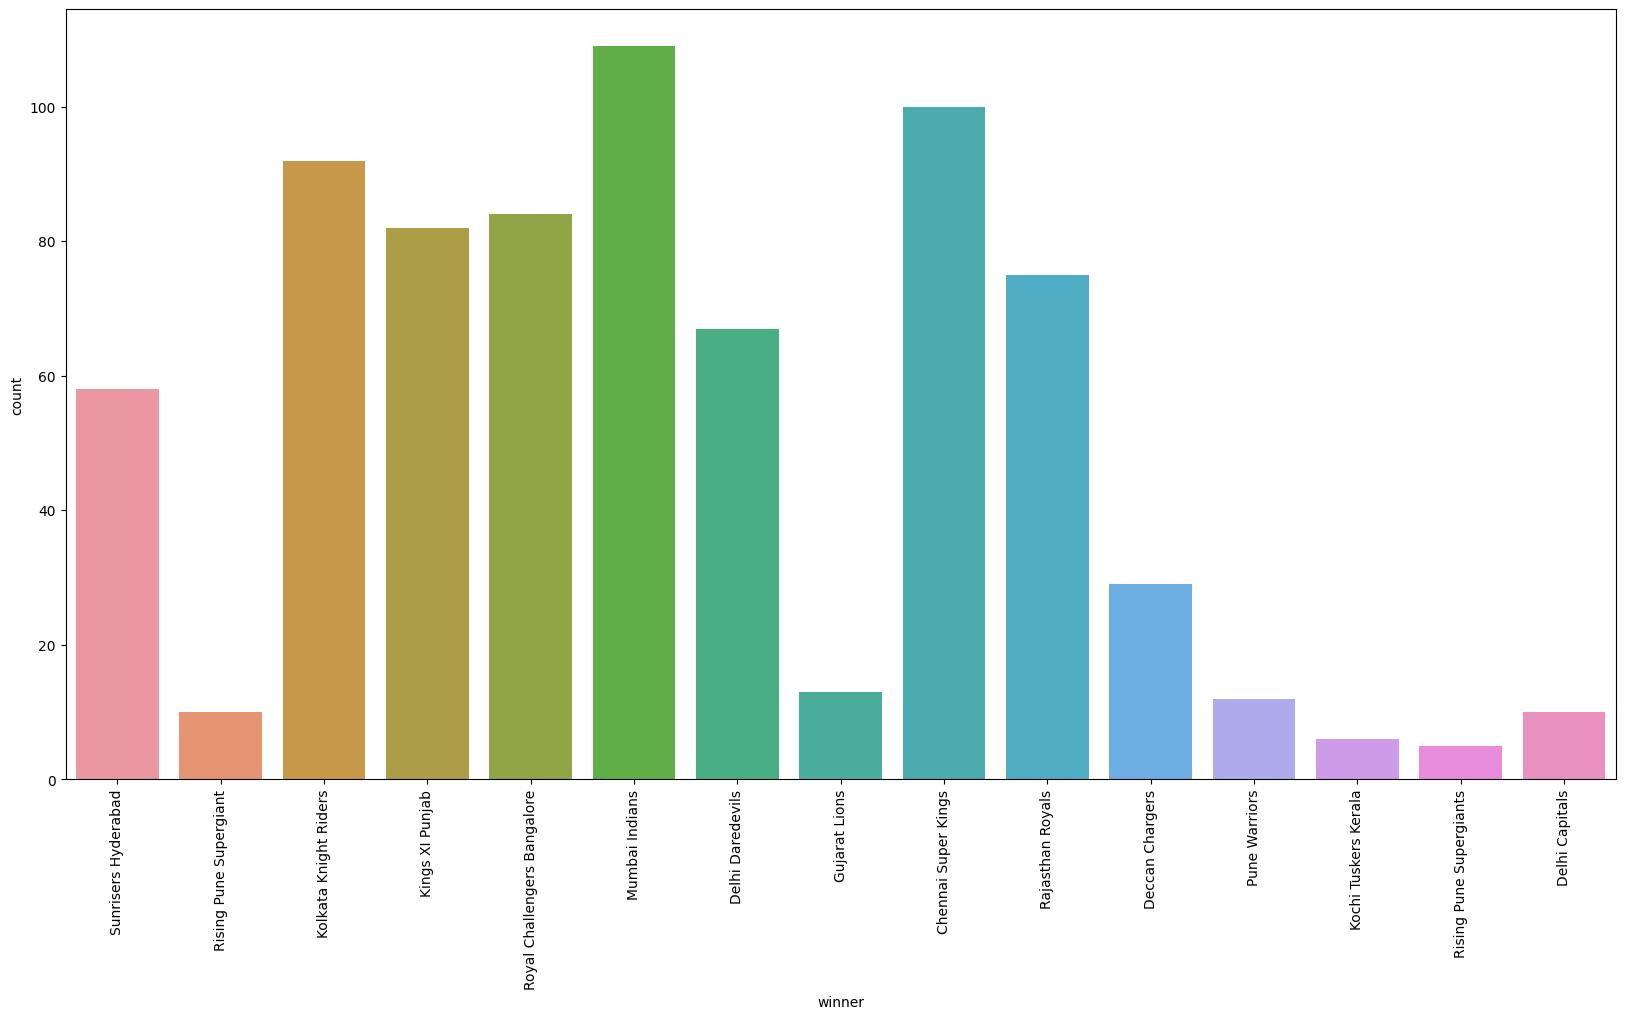

In [42]:
#Wins per Team

plt.figure(figsize = (20, 10))
sns.countplot(x = 'winner', data = m_data)
plt.xticks(rotation = 90)
plt.show()

'Mumbai Indians' has played the most numnber of matches followed by 'Chennai Super Kings'.

In [43]:
#Winner per Season

win_m_data = m_data.drop_duplicates(subset = ['season'], keep = 'last')[['season', 'winner']].reset_index(drop = True)
win_m_data

,season,winner
0,2017,Mumbai Indians
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad


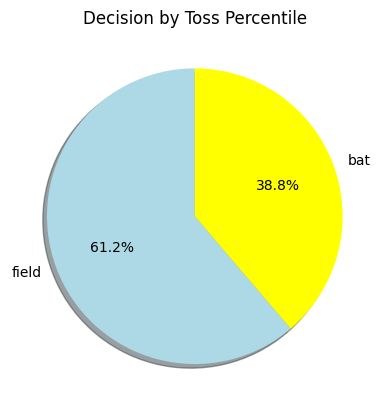

In [44]:
#Decision

toss_m_data = m_data.toss_decision.value_counts()

Label = np.array(toss_m_data.index)
Size = np.array((toss_m_data / toss_m_data.sum())*100)
Color = ['lightblue','yellow']

plt.pie(Size, labels = Label, colors = Color, autopct = '%1.1f%%', shadow = True, startangle = 90)
plt.title("Decision by Toss Percentile")
plt.show()

Decisions made by toss are 61.2% field first and 38.8% bat first. 

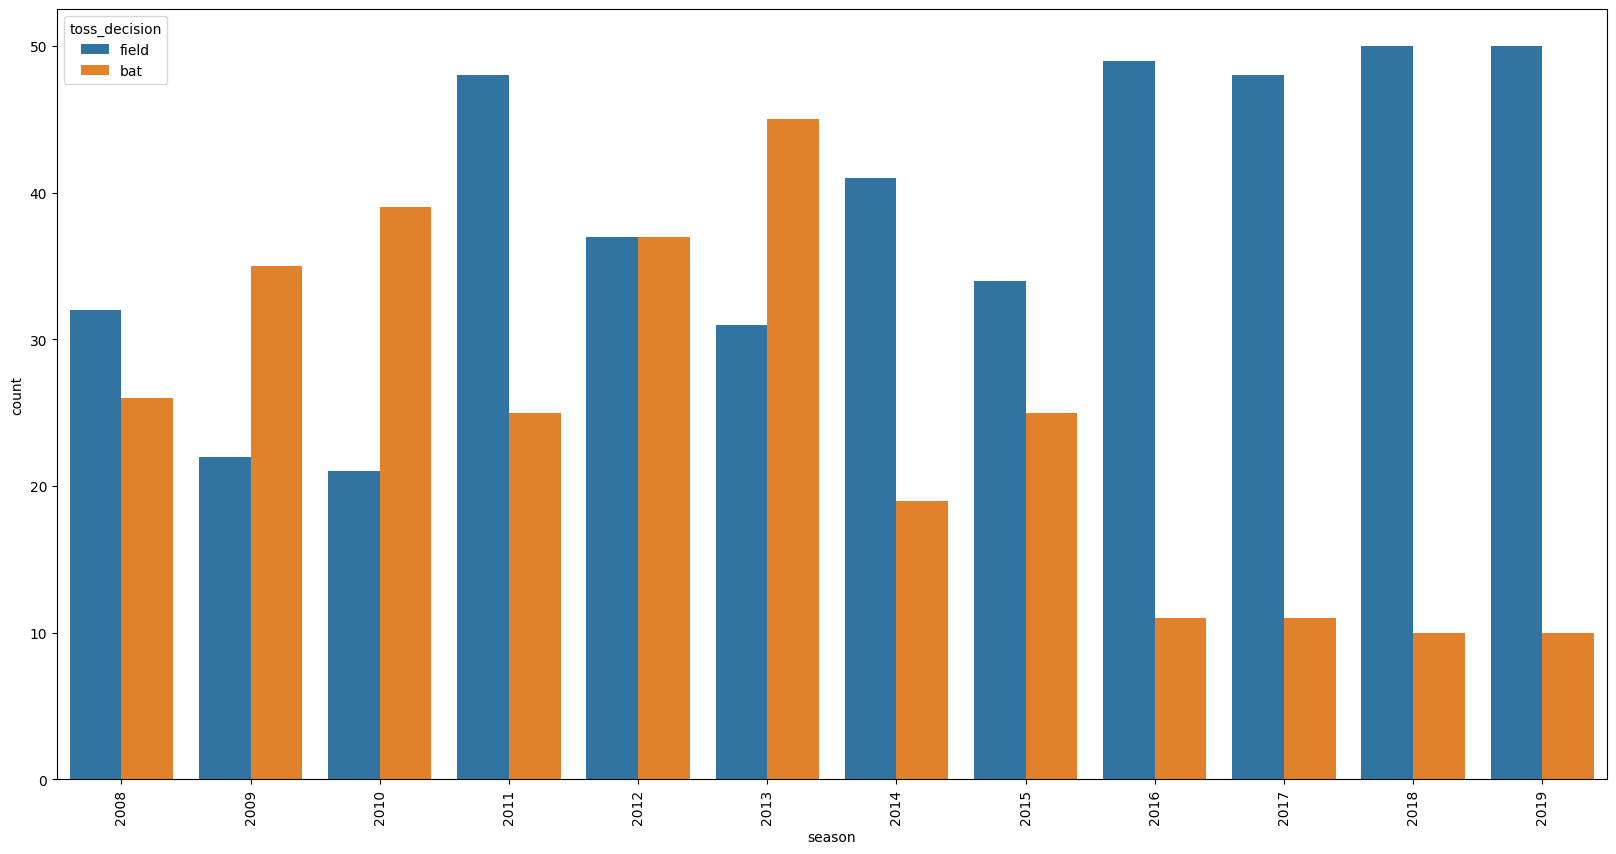

In [45]:
#Over Time Decision

plt.figure(figsize = (20, 10))
sns.countplot(x = 'season', hue = 'toss_decision', data = m_data)
plt.xticks(rotation = 90)
plt.show()

Decisions made by toss were choose bat first in starting years then from 2016, field is chosen first.

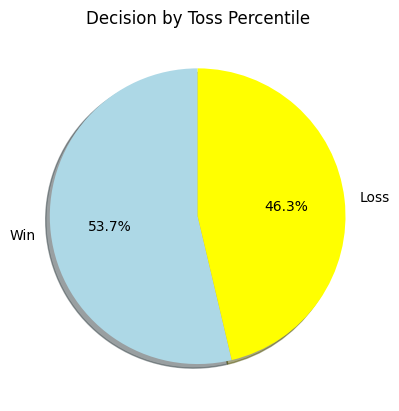

In [46]:
#Percentile of Winning and Lossing

num_win = (m_data.win_by_wickets > 0).sum()
num_loss = (m_data.win_by_wickets == 0).sum()

Label = ["Win", "Loss"]
Total = float(num_win + num_loss)
Size = [(num_win / Total) * 100, (num_loss / Total) * 100]
Color = ['lightblue','yellow']

plt.pie(Size, labels = Label, colors = Color, autopct = '%1.1f%%', shadow = True, startangle = 90)
plt.title("Decision by Toss Percentile")
plt.show()

The winning percentage is 53.7% while lossing percentage is 46.3%

In [47]:
#Players Awarded

def autolabel(Rects):
    for rect in Rects:
        Height = rect.get_height()
        md.text(rect.get_x() + rect.get_width() / 2., 1.02 * Height, '%d' % int(Height), ha = 'center', va = 'bottom') 

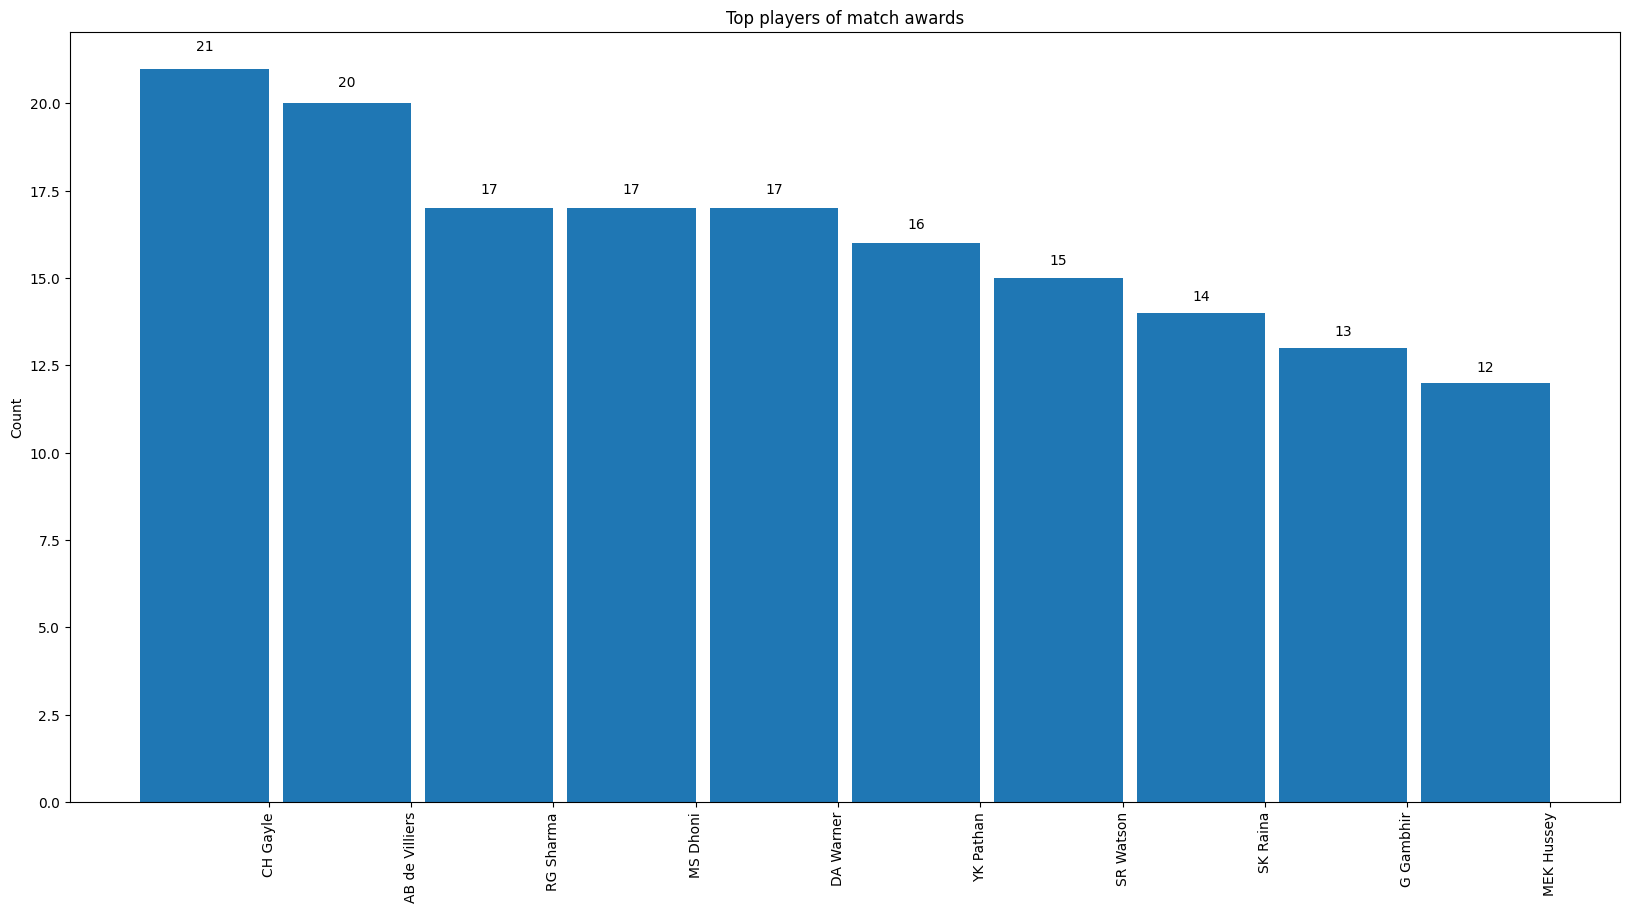

In [48]:
p_m_data = m_data.player_of_match.value_counts()[:10]

Label = np.array(p_m_data.index)
Ind = np.arange(len(Label))
Width = 0.9

Fig, md = plt.subplots(figsize = (20, 10))
Rects = md.bar(Ind, np.array(p_m_data), width = Width)

md.set_xticks(Ind + ((Width) / 2.))
md.set_xticklabels(Label, rotation = 90)
md.set_ylabel("Count")
md.set_title("Top players of match awards")

autolabel(Rects)

plt.show()

'Chris Gayle' is the player who won maximum awards.

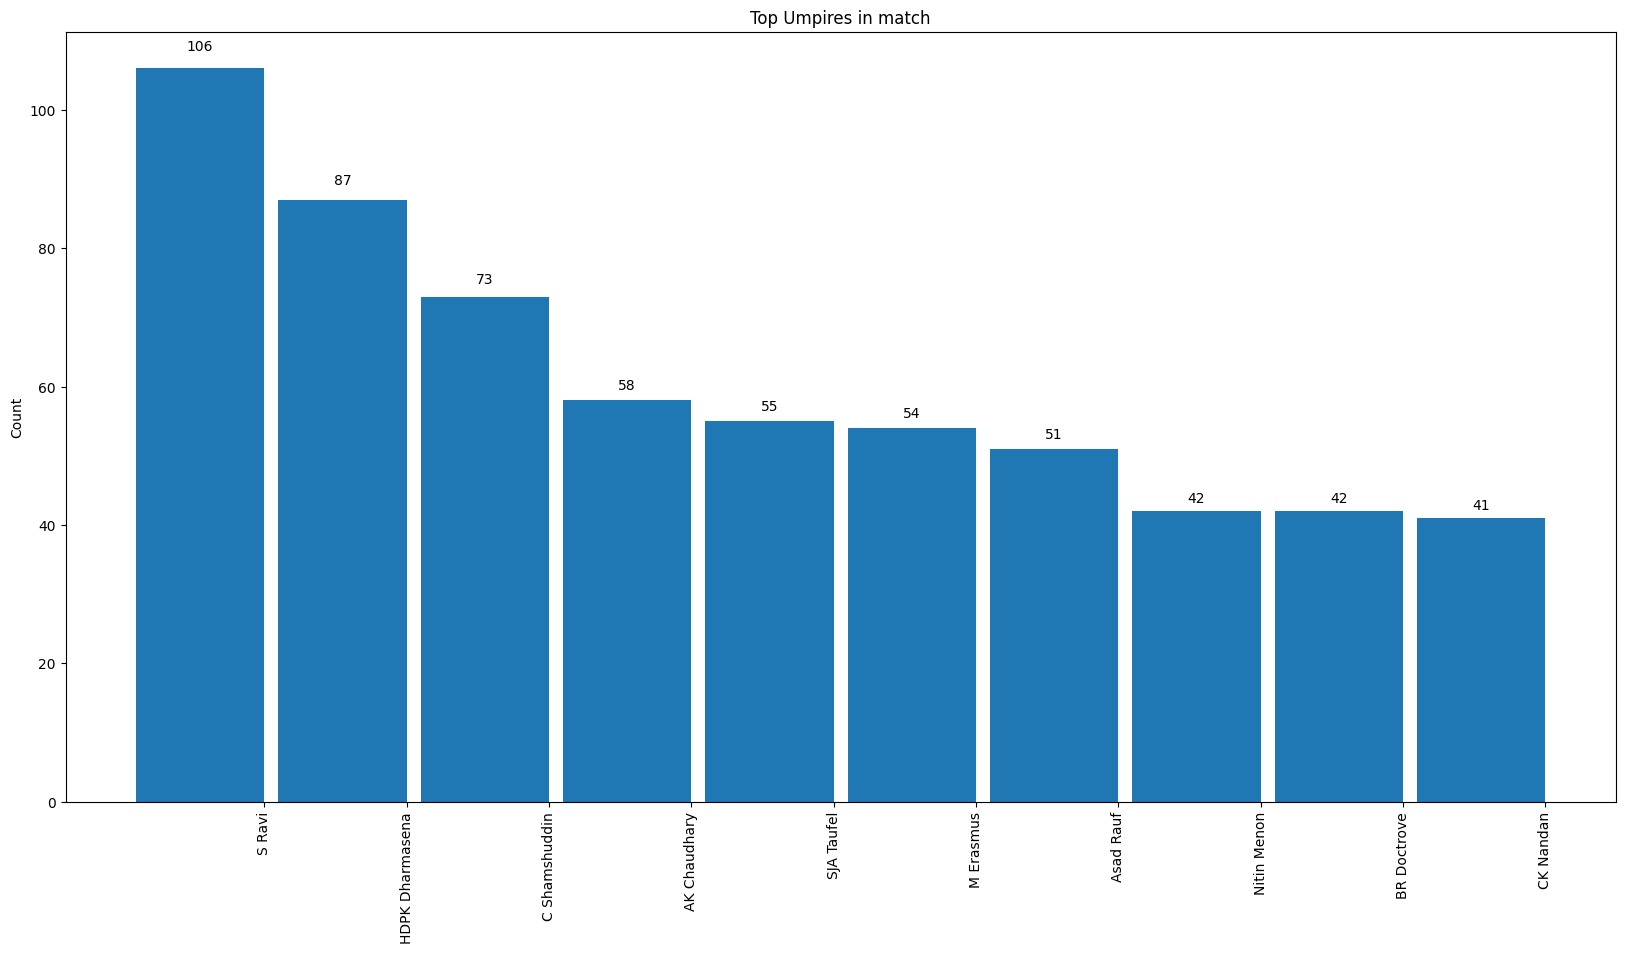

In [49]:
#Umpires

U_DataFrame = pd.melt(m_data, id_vars = ['id'], value_vars = ['umpire1', 'umpire2'])
U_m_data = U_DataFrame.value.value_counts()[:10]

Label = np.array(U_m_data.index)
Ind = np.arange(len(Label))
Width = 0.9

Fig, md = plt.subplots(figsize = (20, 10))
Rects = md.bar(Ind, np.array(U_m_data), width = Width)

md.set_xticks(Ind + ((Width) / 2.))
md.set_xticklabels(Label, rotation = 90)
md.set_ylabel("Count")
md.set_title("Top Umpires in match")

autolabel(Rects)

plt.show()

'Sundaram Ravi' is most likely to select followed by 'Handunnettige Deepthi Priyantha Kumar [HDPK]' for matches.

### 5. Representation Deliveries Data

In [50]:
#Deliveries in match

def autolabel(Rects):
    for rect in Rects:
        Height = rect.get_height()
        bd.text(rect.get_x() + rect.get_width() / 2., 1.02 * Height, '%d' % int(Height), ha = 'center', va = 'bottom') 

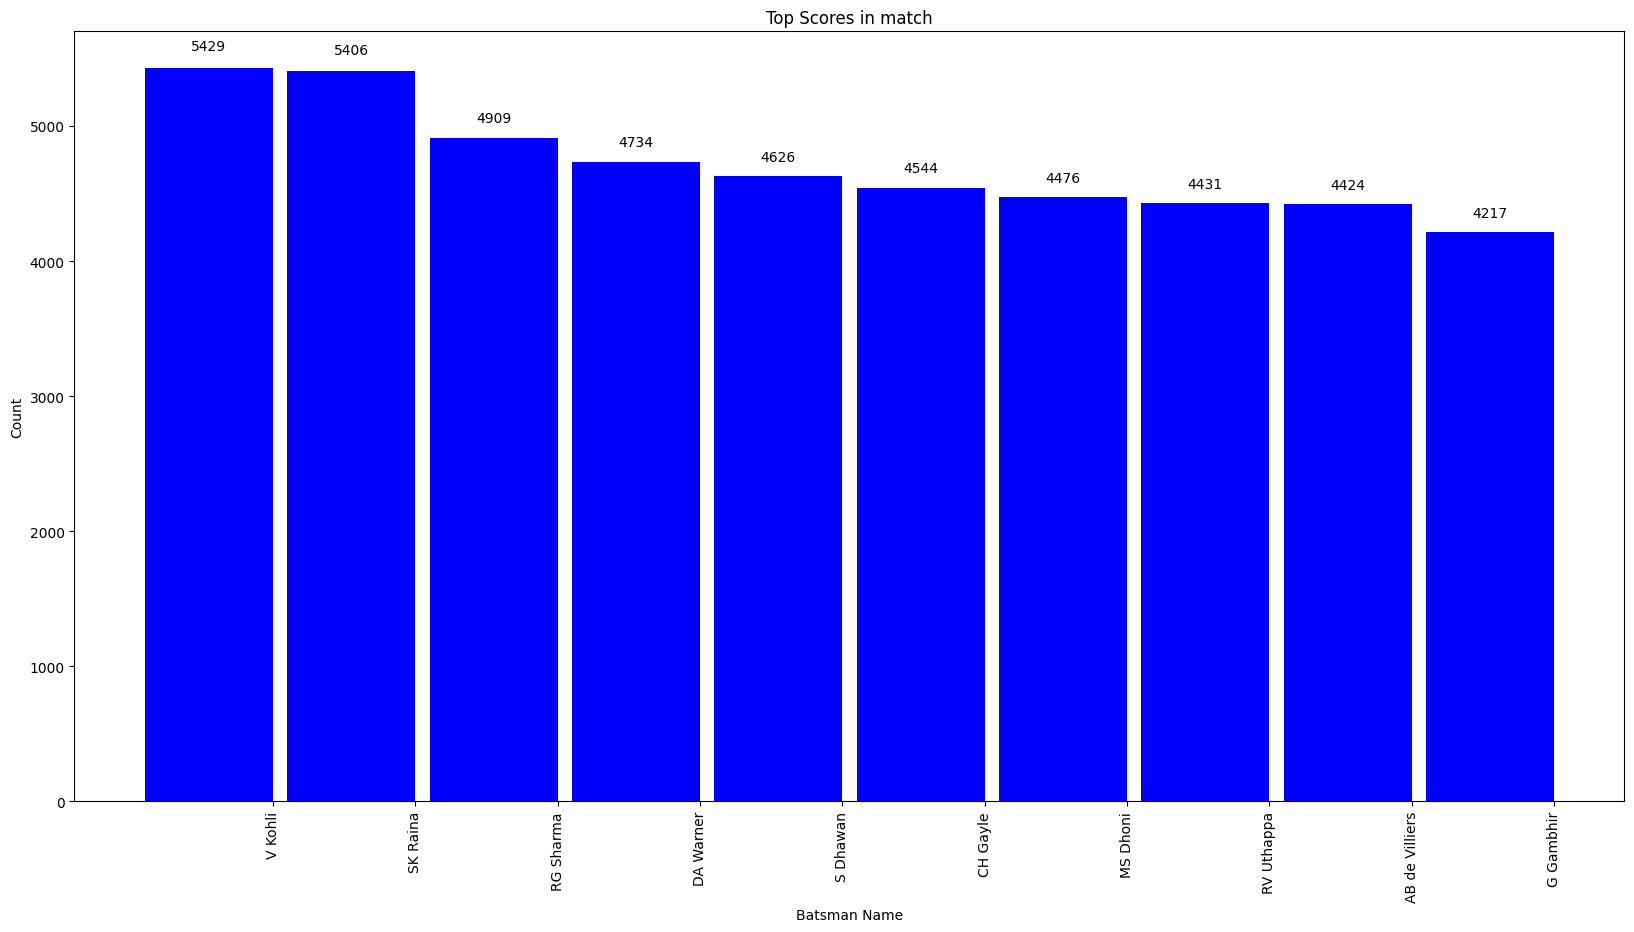

In [51]:
#Batsman Analysis

Bat_d_data = d_data.groupby('batsman')['batsman_runs'].agg('sum').reset_index().sort_values(by = 'batsman_runs', ascending = False)
Bat_d_data = Bat_d_data.iloc[:10,:]

Label = np.array(Bat_d_data['batsman'])
Ind = np.arange(len(Label))
Width = 0.9

Fig, bd = plt.subplots(figsize = (20, 10))
Rects = bd.bar(Ind, np.array(Bat_d_data['batsman_runs']), width = Width, color = 'blue')

bd.set_xticks(Ind + ((Width) / 2.))
bd.set_xticklabels(Label, rotation = 90)
bd.set_ylabel("Count")
bd.set_title("Top Scores in match")
bd.set_xlabel('Batsman Name')

autolabel(Rects)

plt.show()

1. Leading Player in the matches is 'Virat Kohli' followed by a closed margin 'Suresh Raina'.
2. 'David Warner' is the top scorer foreign player.

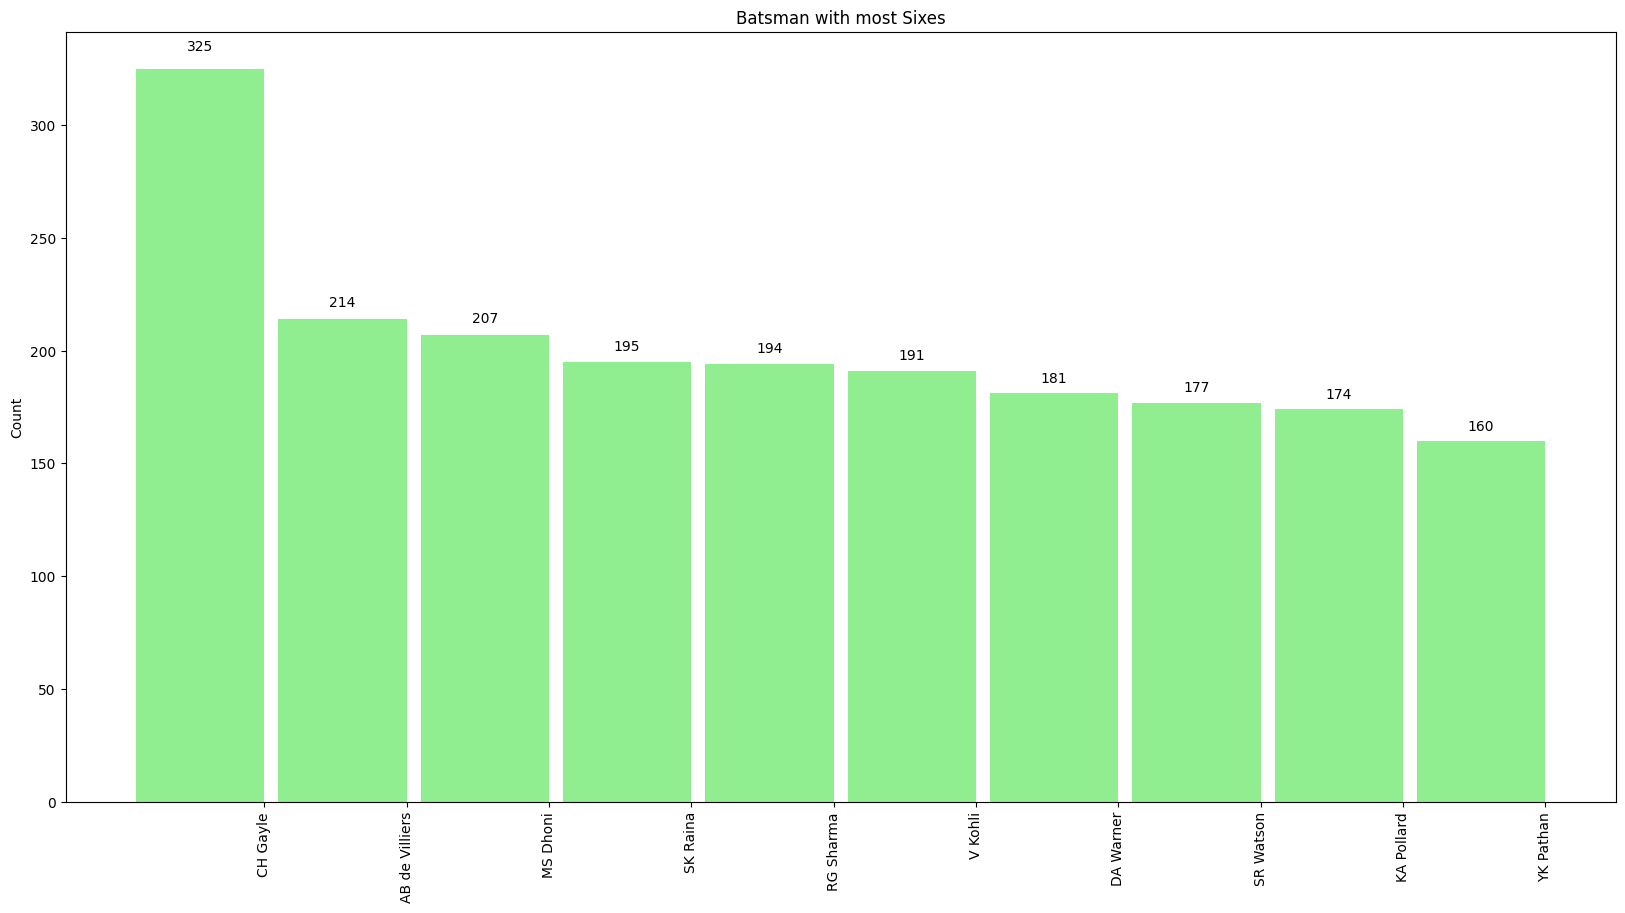

In [52]:
#Six's Analysis

Six_d_data = d_data.groupby('batsman')['batsman_runs'].agg(lambda x : (x == 6).sum()).reset_index().sort_values(by = 'batsman_runs', ascending = False)
Six_d_data = Six_d_data.iloc[:10,:]

Label = np.array(Six_d_data['batsman'])
Ind = np.arange(len(Label))
Width = 0.9

Fig, bd = plt.subplots(figsize = (20, 10))
Rects = bd.bar(Ind, np.array(Six_d_data['batsman_runs']), width = Width, color = 'lightgreen')

bd.set_xticks(Ind + ((Width) / 2.))
bd.set_xticklabels(Label, rotation = 90)
bd.set_ylabel("Count")
bd.set_title("Batsman with most Sixes")

autolabel(Rects)

plt.show()

'Chris Gayle' has maximum sixes.

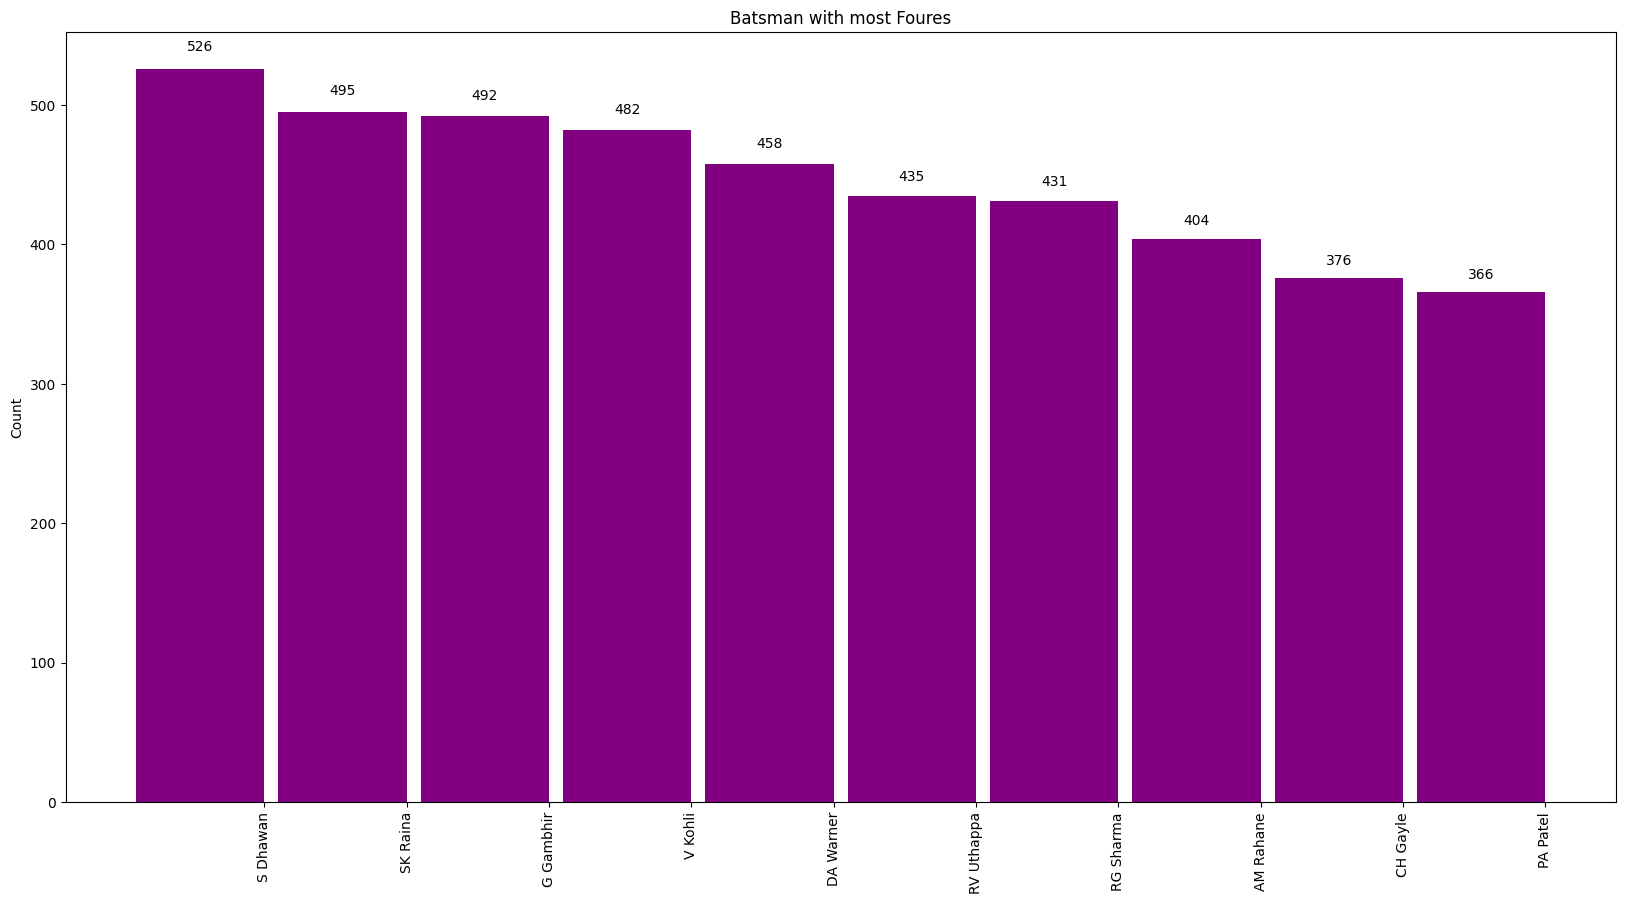

In [53]:
#Four's Analysis

Four_d_data = d_data.groupby('batsman')['batsman_runs'].agg(lambda x : (x == 4).sum()).reset_index().sort_values(by = 'batsman_runs', ascending = False)
Four_d_data = Four_d_data.iloc[:10,:]

Label = np.array(Four_d_data['batsman'])
Ind = np.arange(len(Label))
Width = 0.9

Fig, bd = plt.subplots(figsize = (20, 10))
Rects = bd.bar(Ind, np.array(Four_d_data['batsman_runs']), width = Width, color = 'purple')

bd.set_xticks(Ind + ((Width) / 2.))
bd.set_xticklabels(Label, rotation = 90)
bd.set_ylabel("Count")
bd.set_title("Batsman with most Foures")

autolabel(Rects)

plt.show()

1. 'Shikhar Dhawan' has maximum boundary points.
2. 'Suresh Raina' has position under top 4 in both number of 4's and 6's
3. 'Virat Kohli' and 'David Warner' also has position in top 10 in both number of 4's and 6's

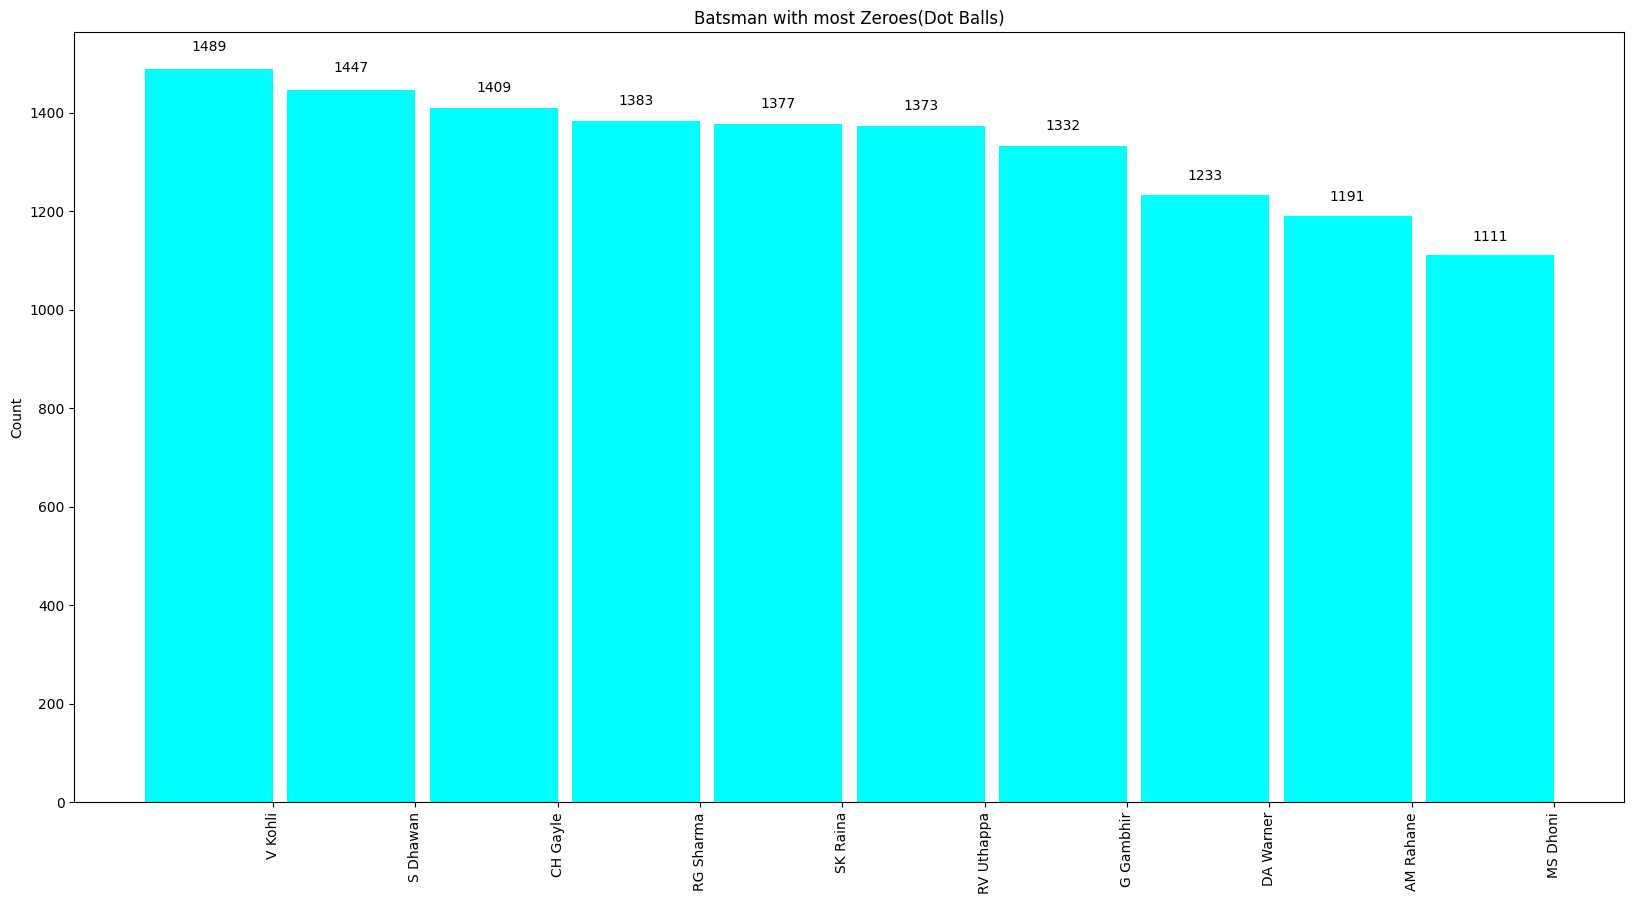

In [54]:
#Zero's Analysis

Zero_d_data = d_data.groupby('batsman')['batsman_runs'].agg(lambda x : (x == 0).sum()).reset_index().sort_values(by = 'batsman_runs', ascending = False)
Zero_d_data = Zero_d_data.iloc[:10,:]

Label = np.array(Zero_d_data['batsman'])
Ind = np.arange(len(Label))
Width = 0.9

Fig, bd = plt.subplots(figsize = (20, 10))
Rects = bd.bar(Ind, np.array(Zero_d_data['batsman_runs']), width = Width, color = 'cyan')

bd.set_xticks(Ind + ((Width) / 2.))
bd.set_xticklabels(Label, rotation = 90)
bd.set_ylabel("Count")
bd.set_title("Batsman with most Zeroes(Dot Balls)")

autolabel(Rects)

plt.show()

Interesting fact is seen here as the names obtained in graph for 'Batsman Analysis' and 'Zero's Analysis' is same.

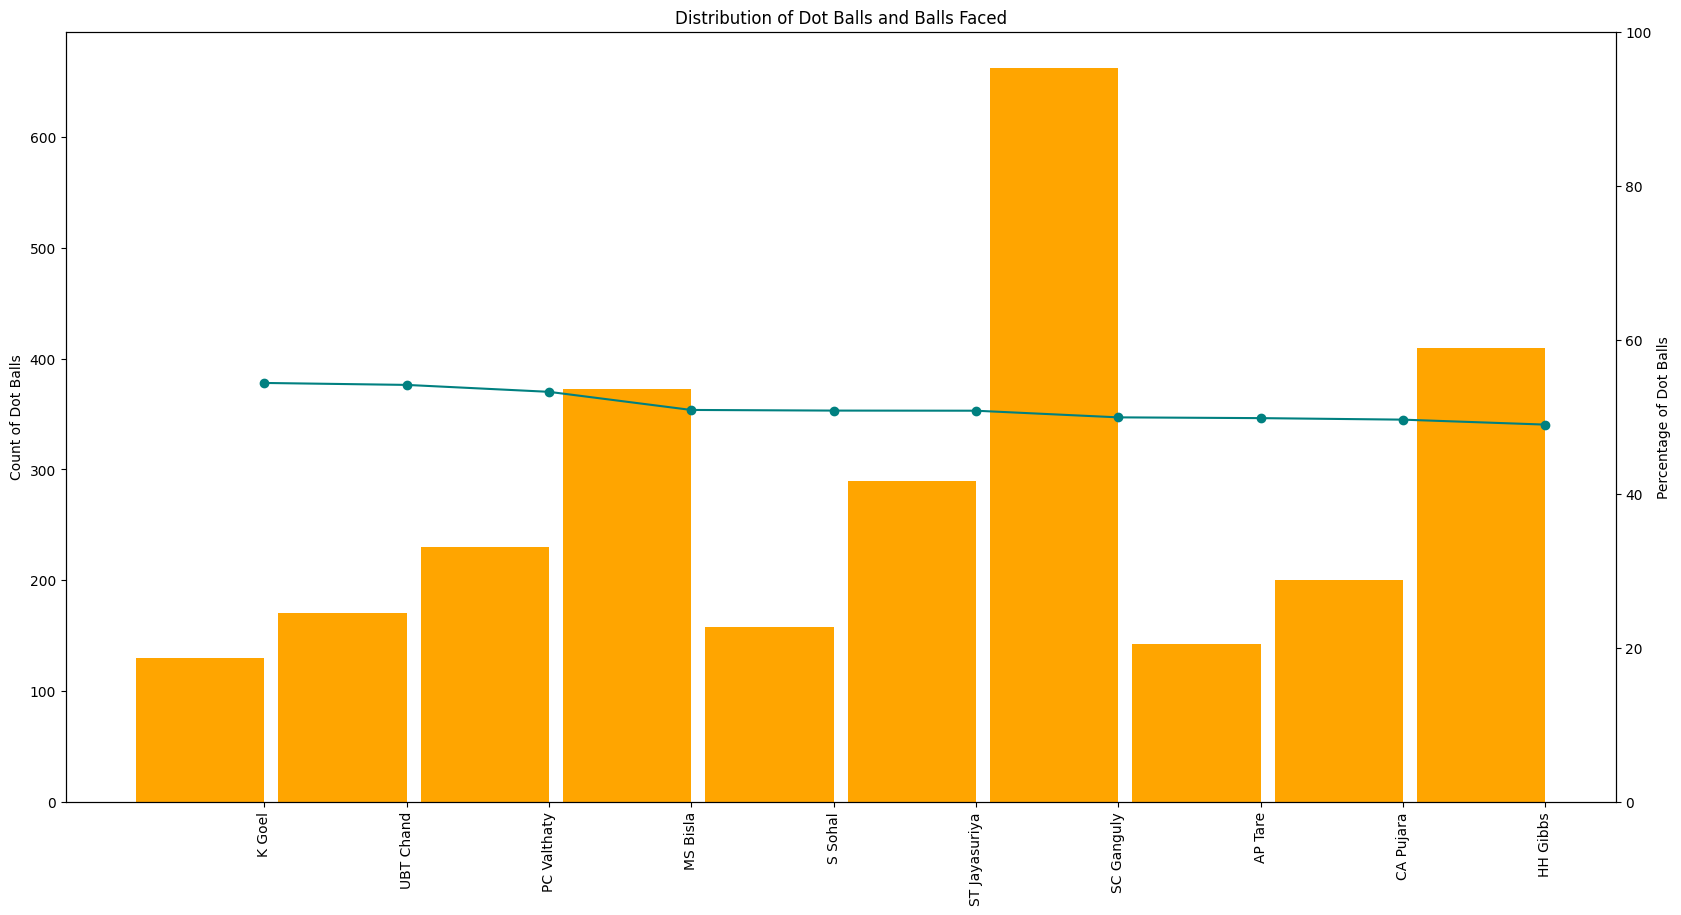

In [55]:
#Distribution Analysis

def balls_faced(x):
    return len(x)

def dot_balls(x):
    return (x == 0).sum()

dis_d_data = d_data.groupby('batsman')['batsman_runs'].agg([balls_faced, dot_balls]).reset_index()
dis_d_data = dis_d_data.loc[dis_d_data.balls_faced > 200,:]
dis_d_data['percentage_of_dot_balls'] = (dis_d_data['dot_balls'] / dis_d_data['balls_faced']) * 100
dis_d_data = dis_d_data.sort_values(by = 'percentage_of_dot_balls', ascending = False).reset_index(drop = True)
dis_d_data = dis_d_data.iloc[:10,:]

Label = np.array(dis_d_data['batsman'])
Ind = np.arange(len(Label))
Width = 0.9

Fig, db = plt.subplots(figsize = (20, 10))
d_b = db.twinx()

Rects = db.bar(Ind, np.array(dis_d_data['dot_balls']), width = Width, color = 'orange')

db.set_xticks(Ind + ((Width) / 2.))
db.set_xticklabels(Label, rotation = 90)
db.set_ylabel("Count of Dot Balls")
db.set_title("Distribution of Dot Balls and Balls Faced")

d_b.plot(Ind + 0.45, np.array(dis_d_data['percentage_of_dot_balls']), color = 'teal', marker = 'o')
d_b.set_ylabel("Percentage of Dot Balls")
d_b.set_ylim([0,100])

plt.show()

1. The batsman who faced morethan 300 balls and the higher percentile of dot balls are seen. 
2. The intresting fact is to see 'Sourav Ganguly' has faced even more than 600 balls and almost half of them were dot balls.

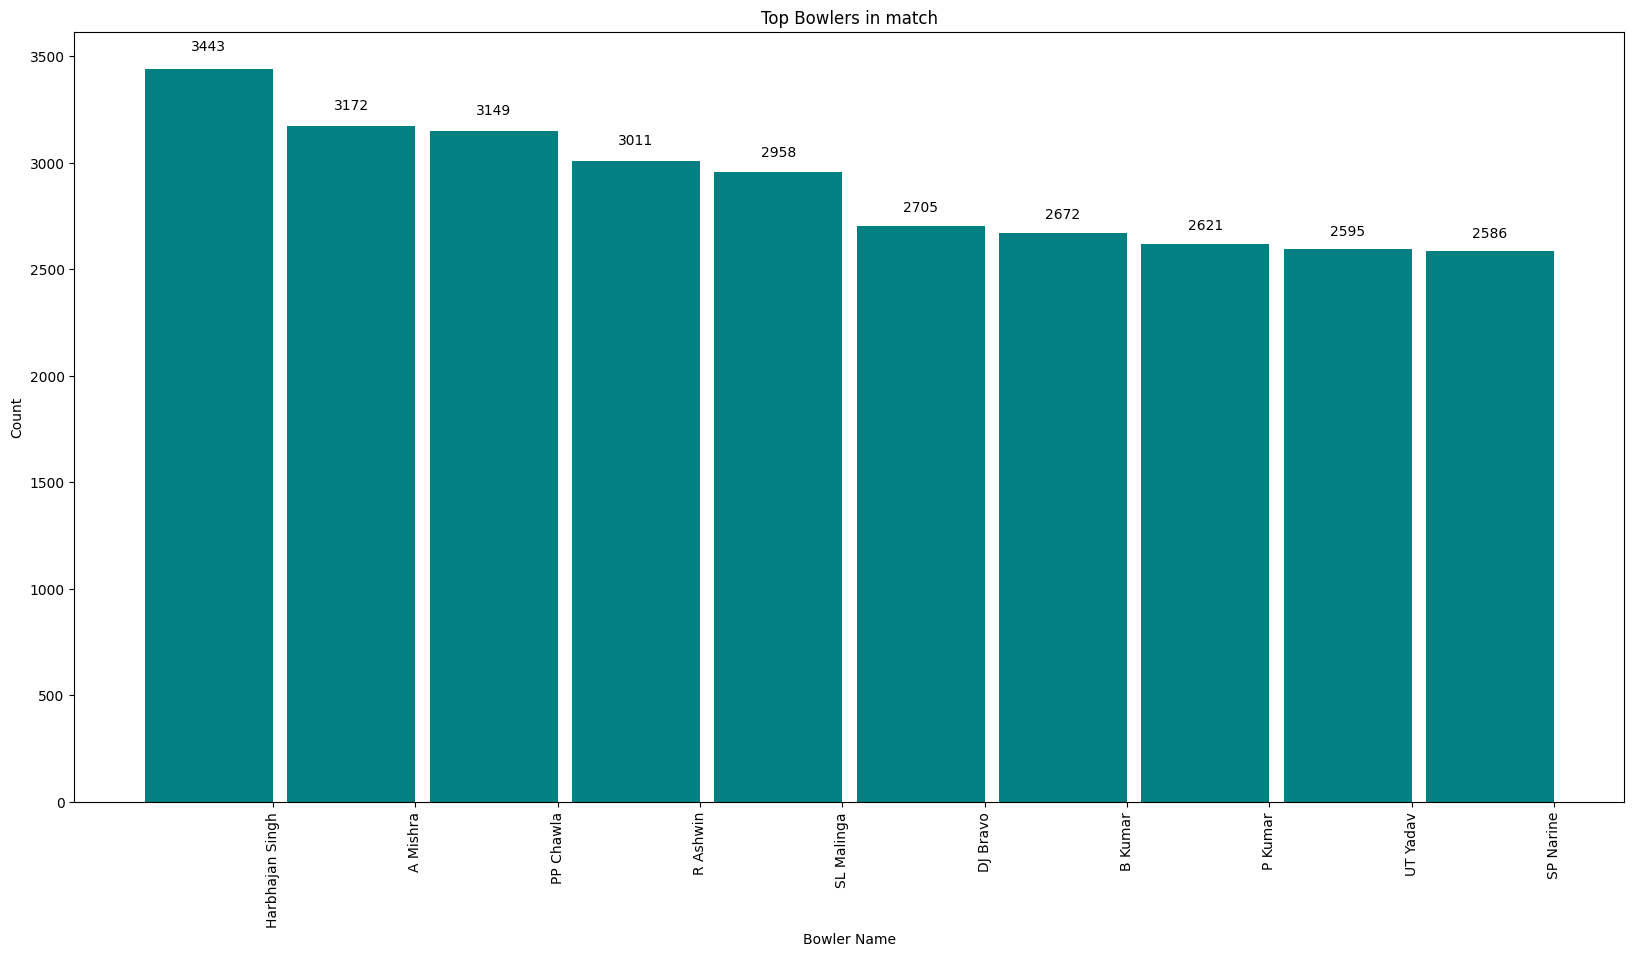

In [56]:
#Bowler Analysis

Bow_d_data = d_data.groupby('bowler')['ball'].agg('count').reset_index().sort_values(by = 'ball', ascending = False)
Bow_d_data = Bow_d_data.iloc[:10,:]

Label = np.array(Bow_d_data['bowler'])
Ind = np.arange(len(Label))
Width = 0.9

Fig, bd = plt.subplots(figsize = (20, 10))
Rects = bd.bar(Ind, np.array(Bow_d_data['ball']), width = Width, color = 'teal')

bd.set_xticks(Ind + ((Width) / 2.))
bd.set_xticklabels(Label, rotation = 90)
bd.set_ylabel("Count")
bd.set_title("Top Bowlers in match")
bd.set_xlabel('Bowler Name')

autolabel(Rects)

plt.show()

'Harbhajan Singh' has maximum number of balls bowled in matches.

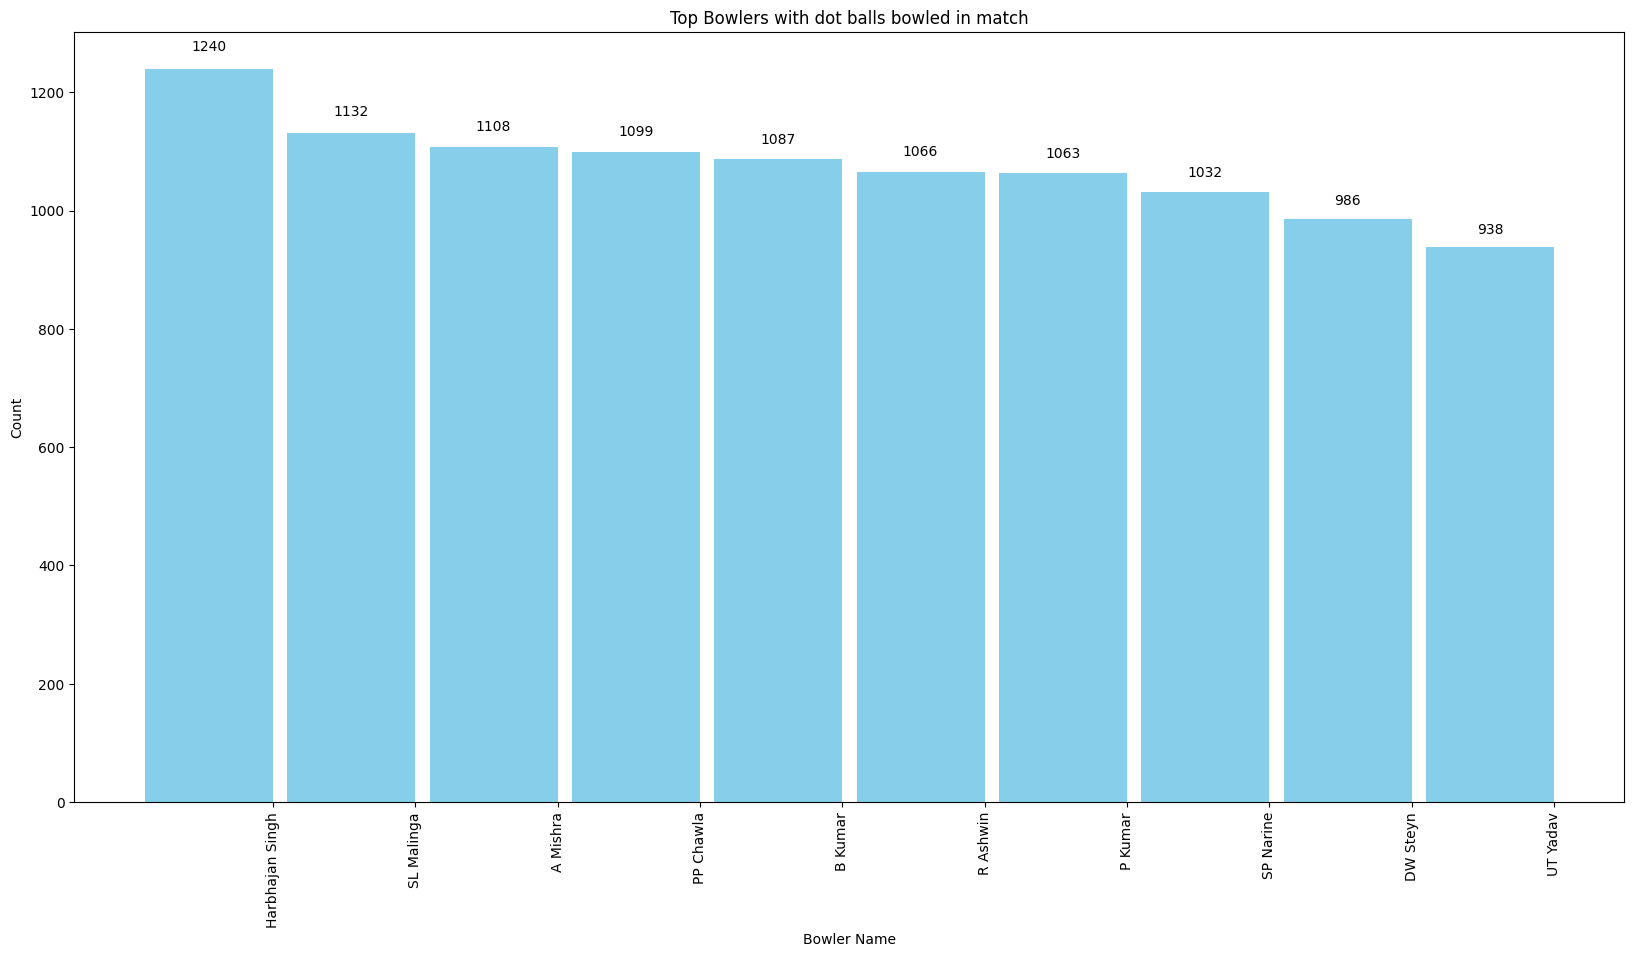

In [57]:
#Dot Balls Analysis

Dot_d_data = d_data.groupby('bowler')['total_runs'].agg(lambda x : (x == 0).sum()).reset_index().sort_values(by = 'total_runs', ascending = False)
Dot_d_data = Dot_d_data.iloc[:10,:]

Label = np.array(Dot_d_data['bowler'])
Ind = np.arange(len(Label))
Width = 0.9

Fig, bd = plt.subplots(figsize = (20, 10))
Rects = bd.bar(Ind, np.array(Dot_d_data['total_runs']), width = Width, color = 'skyblue')

bd.set_xticks(Ind + ((Width) / 2.))
bd.set_xticklabels(Label, rotation = 90)
bd.set_ylabel("Count")
bd.set_title("Top Bowlers with dot balls bowled in match")
bd.set_xlabel('Bowler Name')

autolabel(Rects)

plt.show()

1. 'Harbhajan Singh' has maximum number of dot balls bowled in matches followed by 'Lasith Malinga'.
2. What attracts the most here is 'Harbhajan Singh' has bowled 3451 balls out of which 1224 were dot balls in matches.

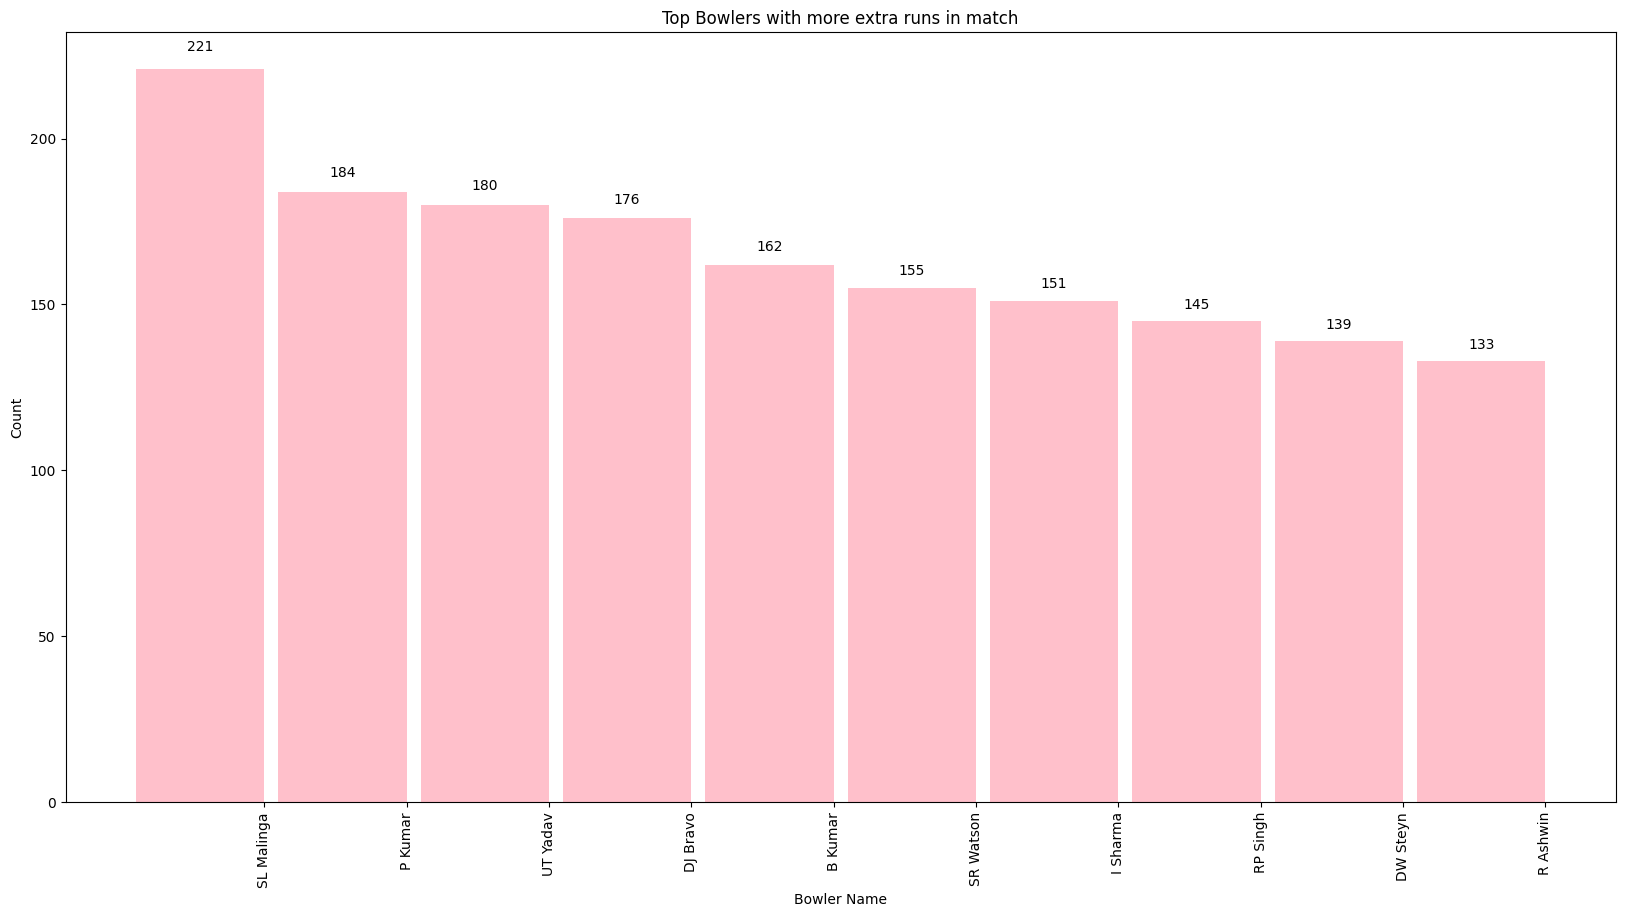

In [58]:
#Extra Runs Analysis

Ext_d_data = d_data.groupby('bowler')['extra_runs'].agg(lambda x : (x > 0).sum()).reset_index().sort_values(by = 'extra_runs', ascending = False)
Ext_d_data = Ext_d_data.iloc[:10,:]

Label = np.array(Ext_d_data['bowler'])
Ind = np.arange(len(Label))
Width = 0.9

Fig, bd = plt.subplots(figsize = (20, 10))
Rects = bd.bar(Ind, np.array(Ext_d_data['extra_runs']), width = Width, color = 'pink')

bd.set_xticks(Ind + ((Width) / 2.))
bd.set_xticklabels(Label, rotation = 90)
bd.set_ylabel("Count")
bd.set_title("Top Bowlers with more extra runs in match")
bd.set_xlabel('Bowler Name')

autolabel(Rects)

plt.show()

'Lasith Malinga' tops the chart of extra runs followed by 'Pravin Kumar'

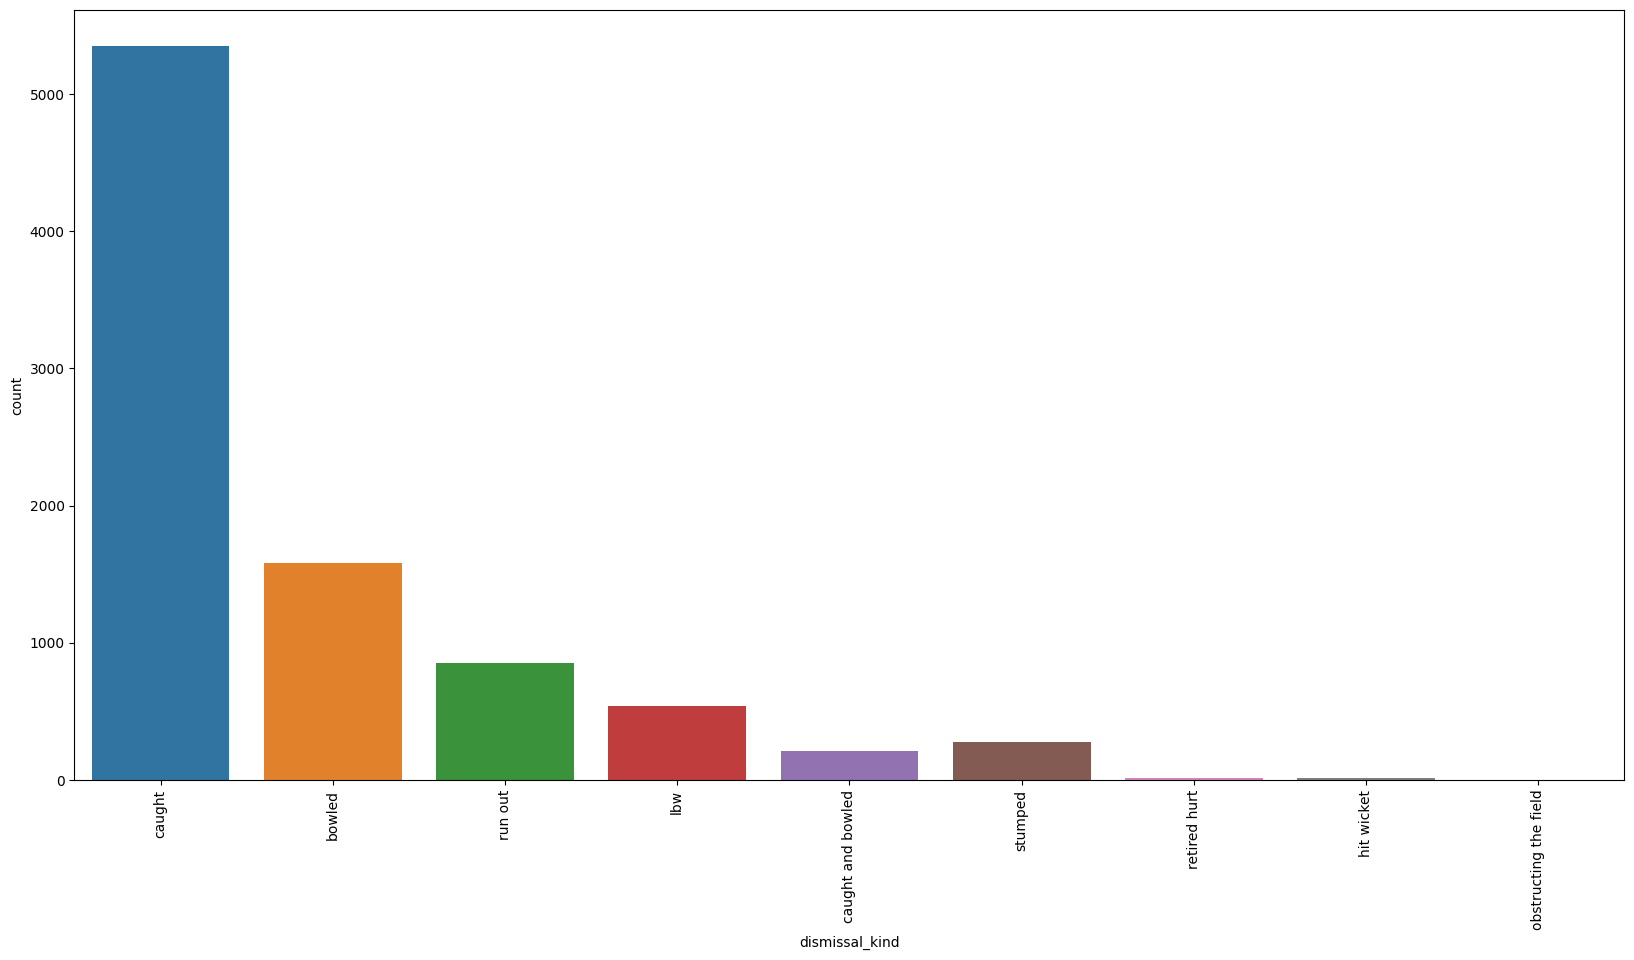

In [59]:
#Common Dismissal

plt.figure(figsize = (20, 10))
sns.countplot(x = 'dismissal_kind', data = d_data)
plt.xticks(rotation = 90)
plt.show()

Most common dismissal type is 'caught' and the least is 'hit wicket' and 'obstructing the field' in the matches.